In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, chebval

In [190]:
def integrate_adaptive(fun, a, b, tol, extra = None):
    
    print('Integrating between', a, b)
    
    if type(extra) == type(None): 
        
        x = np.linspace(a,b,5)
        y = fun(x)
        
        dx=(b-a)/(len(x)-1)
        area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
        area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
        err=np.abs(area1-area2)
        
        saved_data = np.vstack((x,y))
        
        global function_call_counter
        function_call_counter+=len(x)

        
        if err<tol: 
            return area2
        else: 
            midpoint = (a + b)/2
            left = integrate_adaptive(fun, a, midpoint, tol/2, extra = saved_data)
            right = integrate_adaptive(fun, midpoint, b, tol/2, extra = saved_data)
            
            return left + right
    
    else: 
        
        saved_data = extra
        saved_x = saved_data[0]
        saved_y = saved_data[1]

        
        x = np.linspace(a,b,5)
        y = np.empty(len(x))
        
        for i, x_i in enumerate(x):
            
            if x_i in saved_x:
                
                
                index = np.where(saved_x == x_i)[0][0] #Finds location of x_i in saved x values
                y[i] = saved_y[index] #Retrieve already calculated y value corresponding to x_i
            
            else: 
                
                saved_x = np.append(saved_x, x_i) #Save the x value for future reference
                y[i] = fun(x_i) #Calculate the new y value
                saved_y = np.append(saved_y, y[i]) #Save the y value for future reference
               
                function_call_counter+=1
            
                

        saved_data = np.vstack((saved_x, saved_y))
        
        #Now that we've got our x and y values, we can compute error as normal
        dx=(b-a)/(len(x)-1)
        area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
        area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
        err=np.abs(area1-area2)
        
        if err < tol: 
            return area2
        
        
        else:
            midpoint = (a + b)/2
            left = integrate_adaptive(fun, a, midpoint, tol/2, extra = saved_data)
            right = integrate_adaptive(fun, midpoint, b, tol/2, extra = saved_data)

            return left + right


In [191]:
function_call_counter = 0
a = 0
b = 1
ans = integrate_adaptive(np.exp, a, b, 1e-7, extra = None)

Integrating between 0 1
Integrating between 0 0.5
Integrating between 0 0.25
Integrating between 0 0.125
Integrating between 0.125 0.25
Integrating between 0.25 0.5
Integrating between 0.25 0.375
Integrating between 0.25 0.3125
Integrating between 0.3125 0.375
Integrating between 0.375 0.5
Integrating between 0.375 0.4375
Integrating between 0.4375 0.5
Integrating between 0.5 1
Integrating between 0.5 0.75
Integrating between 0.5 0.625
Integrating between 0.5 0.5625
Integrating between 0.5625 0.625
Integrating between 0.625 0.75
Integrating between 0.625 0.6875
Integrating between 0.6875 0.75
Integrating between 0.75 1
Integrating between 0.75 0.875
Integrating between 0.75 0.8125
Integrating between 0.8125 0.875
Integrating between 0.875 1
Integrating between 0.875 0.9375
Integrating between 0.9375 1


In [195]:
def integrate_adaptive_old(fun,x0,x1,tol):
    print('integrating between ',x0,x1)
    #hardwire to use simpsons
    x=np.linspace(x0,x1,5)
    y=fun(x)
    
    global function_call_counter_old
    function_call_counter_old+=5
    
    dx=(x1-x0)/(len(x)-1)
    area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
    area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
    err=np.abs(area1-area2)
    if err<tol:
        return area2
    else:
        xmid=(x0+x1)/2
        left=integrate_adaptive_old(fun,x0,xmid,tol/2)
        right=integrate_adaptive_old(fun,xmid,x1,tol/2)
        return left+right


x0=0
x1=1
if True:
    ans=integrate_adaptive_old(np.exp,x0,x1,1e-7)
    print(ans-(np.exp(x1)-np.exp(x0)))
# else:
#     ans=integrate_adaptive(lorentz,x0,x1,1e-7)
#     print(ans-(np.arctan(x1)-np.arctan(x0)))

    

integrating between  0 1
integrating between  0 0.5
integrating between  0 0.25
integrating between  0 0.125
integrating between  0.125 0.25
integrating between  0.25 0.5
integrating between  0.25 0.375
integrating between  0.25 0.3125
integrating between  0.3125 0.375
integrating between  0.375 0.5
integrating between  0.375 0.4375
integrating between  0.4375 0.5
integrating between  0.5 1
integrating between  0.5 0.75
integrating between  0.5 0.625
integrating between  0.5 0.5625
integrating between  0.5625 0.625
integrating between  0.625 0.75
integrating between  0.625 0.6875
integrating between  0.6875 0.75
integrating between  0.75 1
integrating between  0.75 0.875
integrating between  0.75 0.8125
integrating between  0.8125 0.875
integrating between  0.875 1
integrating between  0.875 0.9375
integrating between  0.9375 1
1.9795676209355406e-09


In [194]:
function_call_counter_old = 0

In [196]:
function_call_counter_old

135

/home/mattias/snap/jupyter/common/lib/python3.7/site-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Using Chebyshev Polynomials up to order 50, it takes a minimum of 53 points to obtain an error of 4.972986458963737e-07 (tolerance = 1e-06)


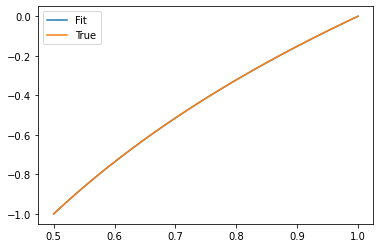

53

In [2]:
def model_log2(x, npts, ord, tol):
    
    
    #Determine points to fit
    x = np.linspace(0.5,1,npts) 
    y = np.log2(x) 
    
    #Scale x values. See explanation in attached PDF. 
    x_scaled = 4*x - 3 
    
    #Fit Chebyshev polynomials. Get coefficients
    coeffs = chebfit(x_scaled, y, ord)
    
    #Compute Error
    xx = np.linspace(-1,1,1000)
    y_cheb_pred = chebval(xx,coeffs) #Predicted y vals
    
    #Transform back to original x values
    reverse_scaled_x = (xx + 3)/4
    y_true = np.log2(reverse_scaled_x)
    
    error = np.std(y_cheb_pred - y_true)
    
    
    if error < tol:
        print('Using Chebyshev Polynomials up to order {0}, it takes a minimum of {1} points to obtain an error of {2} (tolerance = {3})'.format(ord, npts, error, tol))
        plt.plot(reverse_scaled_x, y_cheb_pred, label = 'Fit')
        plt.plot(reverse_scaled_x, y_true, label = 'True')
        plt.legend()
        plt.show()
        
        return len(x)
    
    else: 
        
        increase_npts = model_log2(x,npts+1, ord, tol)
        
        return increase_npts


model_log2(5, 3, 50, 1e-6)

In [99]:
def get_cheby_coeffs(npts = 100, tol = 1e-6, ord = 100):
    
    #Must have same number of points and order to start off
    assert(npts == ord)
    
    #Generate set of points to fit
    x_to_fit = np.linspace(0.5, 1, npts)
    y_to_fit = np.log2(x_to_fit)
    
    #Scale x values to be within (-1, 1)
    x_scaled = 4*x_to_fit - 3
    coeffs = chebfit(x_scaled, y_to_fit, ord)
    
    removed_coeffs = np.copy(coeffs)
    removed_coeffs[np.abs(removed_coeffs)>tol] = 0
    err_tot = np.sum(removed_coeffs)
    print('Removed Excess Coefficients. Max error is', err_tot)
    
    coeffs[np.abs(coeffs)<=tol] = 0

    num_removed_coeffs = len(np.where(coeffs == 0)[0])
    print('Only need {0} coefficients to satisfy accuracy of {1}.'.format(len(coeffs) -  num_removed_coeffs, tol))
    
    xx = np.linspace(-1,1,1000)
    xx = (xx + 3)/4
    yy = chebval(xx, coeffs)
    
    plt.plot(xx,yy)
    plt.plot(xx, np.log2(xx))
    plt.show()
    return coeffs
        
    
    
    
    

Removed Excess Coefficients. Max error is 1.4029532005369895e-07
Only need 93 coefficients to satisfy accuracy of 1e-06.


/home/mattias/snap/jupyter/common/lib/python3.7/site-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


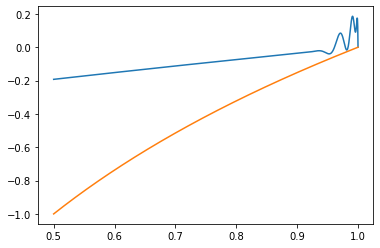

-6.0592717779889905e+85

In [100]:
coeffs = get_cheby_coeffs()
ans = chebval(5, coeffs)
ans

In [87]:
def mylog2(x, npts=50, tol=1e-6, ord=50 ):
    
    coeffs = get_cheby_coeffs(npts, tol, ord)
    M, y = np.frexp(x)
    
    #Re-scale mantissa
    M_scaled = (M + 3)/4
    log2_M = chebval(M_scaled, coeffs)
    print ('y = ', y)
    print(M)
    print(M_scaled, log2_M)
    
    
    
    return (log2_M + y)/1.4426950408889634
    
    

In [10]:
def model_log2(npts=20, ord=19, tol=1e-6):
    
    x = np.linspace(0.5, 1, npts)
    y = np.log2(x)
    
    x_scaled = 4*x - 3
    coeffs = chebfit(x_scaled, y, ord)
    
    coeffs[np.abs(coeffs)<=tol] = 0 
    
    num_removed_coeffs = len(np.where(coeffs == 0)[0])
    print('Removed {0} coefficients. Error tolerance satisfied.'.format(num_removed_coeffs))
    
    return coeffs

In [7]:
coeffs = model_log2(15, 14, 1e-6)

Removed 7 coefficients. Error tolerance satisfied.


In [29]:
def mylog2(x):
    
    M, exp = np.frexp(x) #M between 0.5 and 1, exp an integer
    
    coeffs = model_log2() #Get coefficients
    
    M_scaled = 4*M - 3 #Re-scale M to be between -1 and 1
    log2_pred = chebval(M_scaled, coeffs)# Calculate predicted value using Chebyshev Coefficients
    
    log_e = (log2_pred + exp)/1.4426950408889634
    
    return log_e
    

In [30]:
mylog2(5)

Removed 12 coefficients. Error tolerance satisfied.


1.6094377881893538

In [33]:
np.log(100) - mylog2(100)

Removed 12 coefficients. Error tolerance satisfied.


-7.443434046905395e-08